   # PAX ANALYSIS

## By Hangge Zhang z5241635

# Introduction

The dataset I chose is about the passengers come in and out of the airports in Australia between 1985-2019. The reason I chose the dataset it's because as an international student, I travel a lot between China and Australia, so I take the plane quite a lot of times. So I want to find out the growing trend of the PAX in the eight Australian capital cities.

## Tools

In [5]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv(r'C:\Users\HANGGE ZHANG\Desktop\airport.csv')

#    Overview of the data

In [18]:
data

,AIRPORT,Year,Month,Domestic_In,Domestic_Out,Domestic_Total,International_In,International_Out,International_Total,Pax_In,Pax_Out,Pax_Total
0,ADELAIDE,1985,1,81661,81630,163291,5806,4733,10539,87467,86363,173830
1,ALICE SPRINGS,1985,1,19238,17887,37125,0,0,0,19238,17887,37125
2,All Australian Airports,1985,1,1192395,1192395,2384790,263795,208770,472565,1456190,1401165,2857355
3,BALLINA,1985,1,0,0,0,0,0,0,0,0,0
4,BRISBANE,1985,1,120950,120776,241726,25867,19178,45045,146817,139954,286771
5,CAIRNS,1985,1,18840,19865,38705,1683,1329,3012,20523,21194,41717
6,CANBERRA,1985,1,33809,30739,64548,0,0,0,33809,30739,64548
7,DARWIN,1985,1,17450,14328,31778,2942,1837,4779,20392,16165,36557
8,GOLD COAST,1985,1,35352,44203,79555,0,0,0,35352,44203,79555
9,HAMILTON ISLAND,1985,1,2106,2398,4504,0,0,0,2106,2398,4504


# Filtering the charts by All Australian Airports

In [8]:
allAA_year = data[data.AIRPORT=='All Australian Airports']
data_year = allAA_year.groupby('Year').sum()[['Domestic_Total', 'International_Total', 'Pax_Total']][0: -1]
data_year

,Domestic_Total,International_Total,Pax_Total
Year,,,
1985,28194896,5200373,33395269
1986,29662160,5818437,35480597
1987,31203052,6714432,37917484
1988,33718506,7766782,41485288
1989,25111370,7931103,33042473
1990,30400102,8522225,38922327
1991,38411482,8652577,47064059
1992,40370762,9307928,49678690
1993,43204886,10178285,53383171


In [9]:
d1 = data_year['Pax_Total']

## Total Amount of Passengers in Australia between 1985-2018

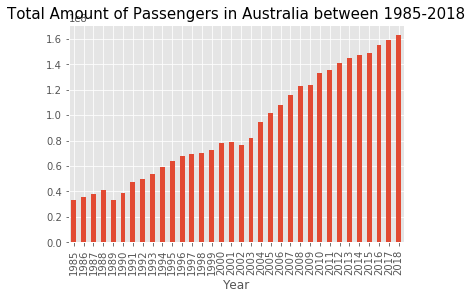

In [10]:
plt.style.use('ggplot')
d1.T.plot(kind='bar')
plt.title('Total Amount of Passengers in Australia between 1985-2018',fontsize=15)
matplotlib.rc('xtick', labelsize=10) 
plt.rcParams['figure.figsize']=(10,6)

In [11]:
domestic_year = data_year[['Domestic_Total']].values
domestic_year = domestic_year.flatten()
international_year = data_year[['International_Total']].values
international_year = international_year.flatten()
pax_year = data_year[['Pax_Total']].values
pax_year = pax_year.flatten()

## Domestic & International passengers within Total amount of passengers 

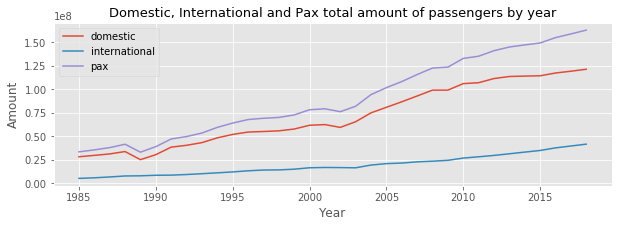

In [12]:
plt.figure(figsize=(10,3))

plt.plot(range(1985, 2019), domestic_year, label='domestic')
plt.plot(range(1985, 2019), international_year, label='international')
plt.plot(range(1985, 2019), pax_year, label='pax')

plt.title('Domestic, International and Pax total amount of passengers by year', size = 13)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc=2)

plt.show()

In [13]:
canberra_domestic = data[(data.Year==2018) & (data.AIRPORT =='CANBERRA')][['Domestic_Total']].values.flatten()
sydney_domestic = data[(data.Year==2018) & (data.AIRPORT =='SYDNEY')][['Domestic_Total']].values.flatten()
melbourne_domestic = data[(data.Year==2018) & (data.AIRPORT =='MELBOURNE')][['Domestic_Total']].values.flatten()
bisbane_domestic = data[(data.Year==2018) & (data.AIRPORT =='BRISBANE')][['Domestic_Total']].values.flatten()
perth_domestic = data[(data.Year==2018) & (data.AIRPORT =='PERTH')][['Domestic_Total']].values.flatten()
adelaide_domestic = data[(data.Year==2018) & (data.AIRPORT =='ADELAIDE')][['Domestic_Total']].values.flatten()
hobart_domestic = data[(data.Year==2018) & (data.AIRPORT =='HOBART')][['Domestic_Total']].values.flatten()
darwin_domestic = data[(data.Year==2018) & (data.AIRPORT =='DARWIN')][['Domestic_Total']].values.flatten()

canberra_international = data[(data.Year==2018) & (data.AIRPORT =='CANBERRA')][['International_Total']].values.flatten()
sydney_international = data[(data.Year==2018) & (data.AIRPORT =='SYDNEY')][['International_Total']].values.flatten()
melbourne_international = data[(data.Year==2018) & (data.AIRPORT =='MELBOURNE')][['International_Total']].values.flatten()
bisbane_international = data[(data.Year==2018) & (data.AIRPORT =='BRISBANE')][['International_Total']].values.flatten()
perth_international = data[(data.Year==2018) & (data.AIRPORT =='PERTH')][['International_Total']].values.flatten()
adelaide_international = data[(data.Year==2018) & (data.AIRPORT =='ADELAIDE')][['International_Total']].values.flatten()
hobart_international = data[(data.Year==2018) & (data.AIRPORT =='HOBART')][['International_Total']].values.flatten()
darwin_international = data[(data.Year==2018) & (data.AIRPORT =='DARWIN')][['International_Total']].values.flatten()

canberra_pax = data[(data.Year==2018) & (data.AIRPORT =='CANBERRA')][['Pax_Total']].values.flatten()
sydney_pax = data[(data.Year==2018) & (data.AIRPORT =='SYDNEY')][['Pax_Total']].values.flatten()
melbourne_pax = data[(data.Year==2018) & (data.AIRPORT =='MELBOURNE')][['Pax_Total']].values.flatten()
bisbane_pax = data[(data.Year==2018) & (data.AIRPORT =='BRISBANE')][['Pax_Total']].values.flatten()
perth_pax= data[(data.Year==2018) & (data.AIRPORT =='PERTH')][['Pax_Total']].values.flatten()
adelaide_pax = data[(data.Year==2018) & (data.AIRPORT =='ADELAIDE')][['Pax_Total']].values.flatten()
hobart_pax = data[(data.Year==2018) & (data.AIRPORT =='HOBART')][['Pax_Total']].values.flatten()
darwin_pax = data[(data.Year==2018) & (data.AIRPORT =='DARWIN')][['Pax_Total']].values.flatten()


## Distribution of the amount of total passengers from 2000 - 2018

Text(0.5, 1.0, 'Pax_total of eight cities in last 10 years')

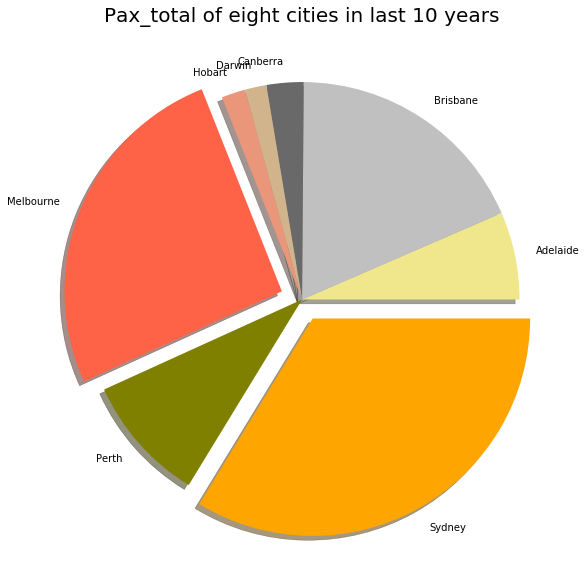

In [24]:
pie_data = data[(data.Year>=2000) & (data.Year<=2018) & 
     (data.AIRPORT.isin(['CANBERRA', 'SYDNEY', 'MELBOURNE', 'BRISBANE', 'PERTH', 'ADELAIDE', 'HOBART', 'DARWIN']))]
pie_data = pie_data[['AIRPORT', 'Pax_Total']]
pie_data = pie_data.groupby('AIRPORT').sum()
pie_data = pie_data.Pax_Total.values.flatten()

cities = ['Adelaide', 'Brisbane', 'Canberra', 'Darwin', 'Hobart','Melbourne','Perth','Sydney']
colors = ['khaki','silver','dimgray','tan','darksalmon','tomato','olive','orange']
explode = [0,0,0,0,0,0.1,0,0.1]

plt.figure(figsize=(10, 10))
plt.pie(pie_data, shadow=True, labels = cities, colors = colors, explode = explode)
startangle=180

plt.title('Pax_total of eight cities in last 10 years', fontsize=20)

# Heatmap of total passengers in eight cites from 2000 - 2018

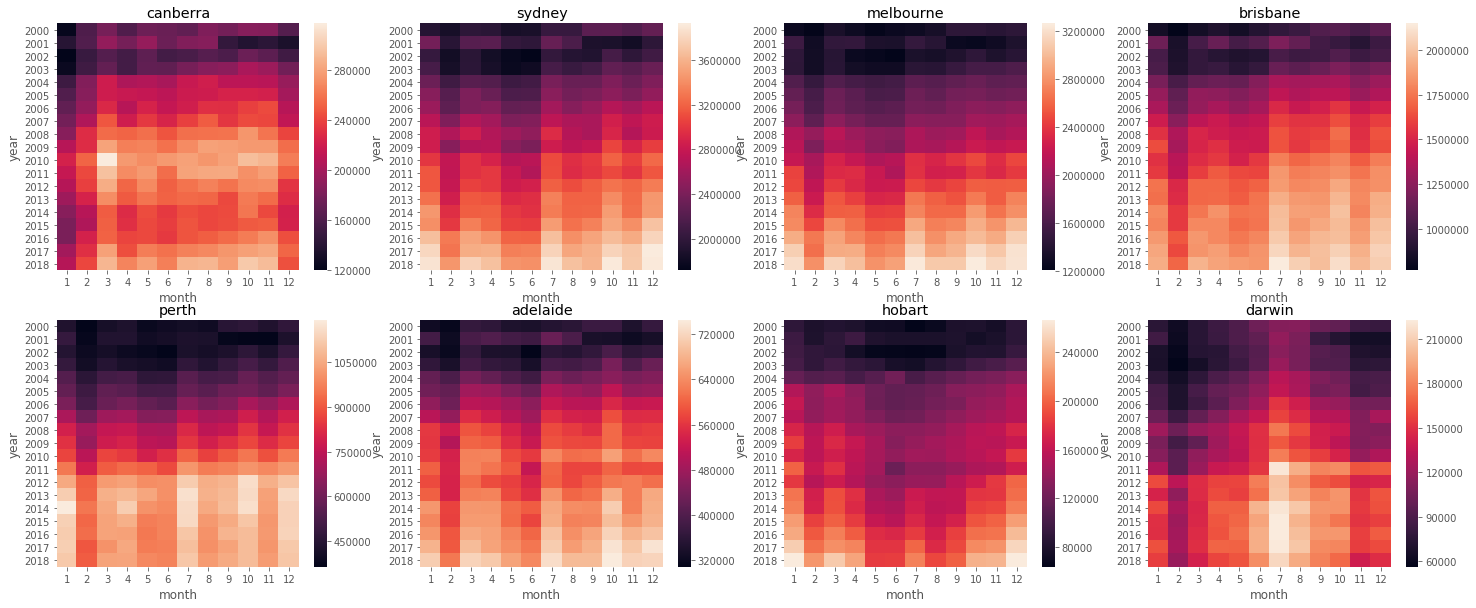

In [23]:

plt.figure(figsize=(25, 10))

plt.subplot(241)
canberra_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='CANBERRA')][['Year', 'Month', 'Pax_Total']]
canberra_pivot = canberra_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(canberra_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('canberra')

plt.subplot(242)
sydney_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='SYDNEY')][['Year', 'Month', 'Pax_Total']]
sydney_pivot = sydney_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(sydney_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('sydney')

plt.subplot(243)
melbourne_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='MELBOURNE')][['Year', 'Month', 'Pax_Total']]
melbourne_pivot = melbourne_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(melbourne_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('melbourne')

plt.subplot(244)
brisbane_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='BRISBANE')][['Year', 'Month', 'Pax_Total']]
brisbane_pivot = brisbane_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(brisbane_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('brisbane')

plt.subplot(245)
perth_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='PERTH')][['Year', 'Month', 'Pax_Total']]
perth_pivot = perth_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(perth_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('perth')

plt.subplot(246)
adelaide_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='ADELAIDE')][['Year', 'Month', 'Pax_Total']]
adelaide_pivot = adelaide_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(adelaide_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('adelaide')

plt.subplot(247)
hobart_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='HOBART')][['Year', 'Month', 'Pax_Total']]
hobart_pivot = hobart_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(hobart_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('hobart')

plt.subplot(248)
darwin_pivot = data[(data.Year>=2000) & (data.Year<=2018) & (data.AIRPORT=='DARWIN')][['Year', 'Month', 'Pax_Total']]
darwin_pivot = darwin_pivot.pivot('Year', 'Month', 'Pax_Total')
sns.heatmap(darwin_pivot)
plt.xlabel('month')
plt.ylabel('year')
plt.title('darwin')

plt.show()

# Trendency of eight cities' domestic aiports' amount of passengers in 2018

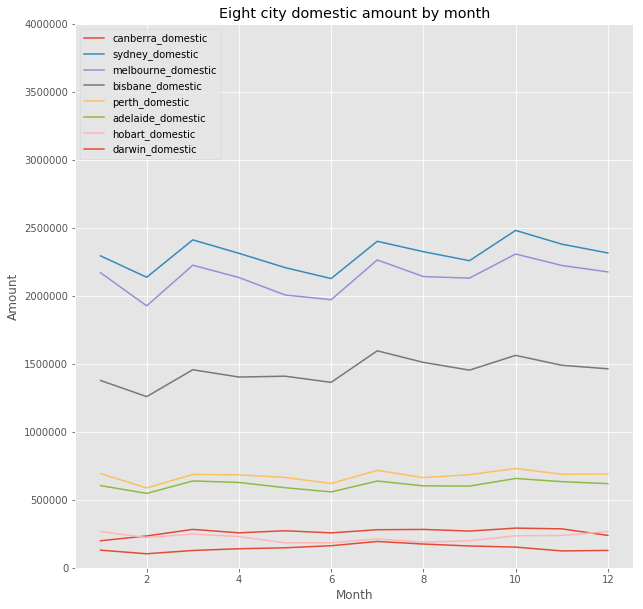

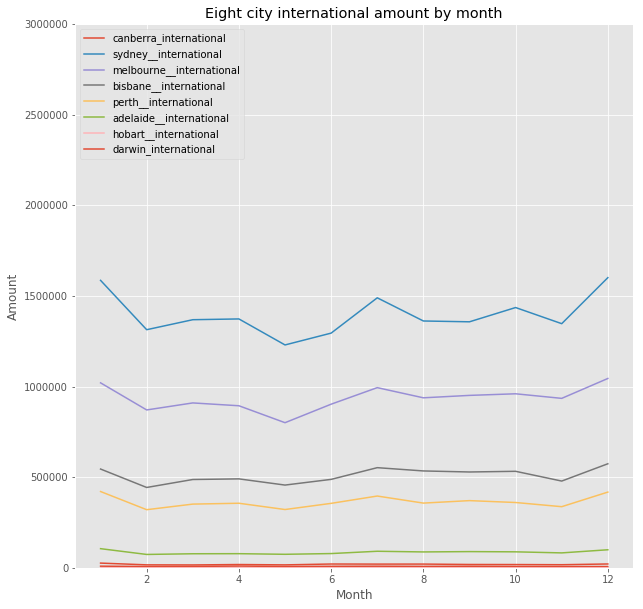

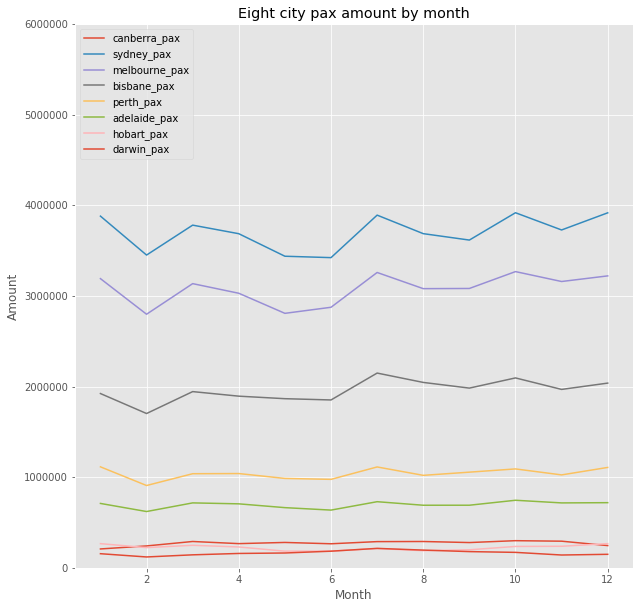

In [15]:
# plt.subplot(1, 3, 1)

plt.figure(figsize=(10, 10))
plt.ylim(0, 4000000)

plt.plot(range(1, 13), canberra_domestic, label='canberra_domestic')
plt.plot(range(1, 13), sydney_domestic, label='sydney_domestic')
plt.plot(range(1, 13), melbourne_domestic, label='melbourne_domestic')
plt.plot(range(1, 13), bisbane_domestic, label='bisbane_domestic')
plt.plot(range(1, 13), perth_domestic, label='perth_domestic')
plt.plot(range(1, 13), adelaide_domestic, label='adelaide_domestic')
plt.plot(range(1, 13), hobart_domestic, label='hobart_domestic')
plt.plot(range(1, 13), darwin_domestic, label='darwin_domestic')

plt.title('Eight city domestic amount by month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(loc=2)

# plt.subplot(1, 3, 2)
plt.figure(figsize=(10, 10))
plt.ylim(0, 3000000)

plt.plot(range(1, 13), canberra_international, label='canberra_international')
plt.plot(range(1, 13), sydney_international, label='sydney__international')
plt.plot(range(1, 13), melbourne_international, label='melbourne__international')
plt.plot(range(1, 13), bisbane_international, label='bisbane__international')
plt.plot(range(1, 13), perth_international, label='perth__international')
plt.plot(range(1, 13), adelaide_international, label='adelaide__international')
plt.plot(range(1, 13), hobart_international, label='hobart__international')
plt.plot(range(1, 13), darwin_international, label='darwin_international')

plt.title('Eight city international amount by month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(loc=2)
         
# plt.subplot(1, 3, 3)
plt.figure(figsize=(10, 10))
plt.ylim(0, 6000000)

plt.plot(range(1, 13), canberra_pax, label='canberra_pax')
plt.plot(range(1, 13), sydney_pax, label='sydney_pax')
plt.plot(range(1, 13), melbourne_pax, label='melbourne_pax')
plt.plot(range(1, 13), bisbane_pax, label='bisbane_pax')
plt.plot(range(1, 13), perth_pax, label='perth_pax')
plt.plot(range(1, 13), adelaide_pax, label='adelaide_pax')
plt.plot(range(1, 13), hobart_pax, label='hobart_pax')
plt.plot(range(1, 13), darwin_pax, label='darwin_pax')

plt.title('Eight city pax amount by month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(loc=2)
         
plt.show()